<a href="https://colab.research.google.com/github/DebarghaNath/DebarghaNath/blob/main/pytoch_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi #GPU Allocated online

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
#CUDA compute unified device architecture to run codes in nvidia GPU

2.5.1+cu124


Tensor Introduction

In [3]:
#scalar:
scalar = torch.tensor(7)
scalar.ndim #dimension of tensor scalar is 0D
scalar.item() #retrieve scalar as Python int

7

In [4]:
#vector:
vector = torch.tensor([7,7])
vector.ndim # 1D for vector & parameter for vector
vector.shape # number of vectors or tensors

torch.Size([2])

In [5]:
#Matrix
matrix = torch.tensor([[7,8],[5,6],[3,4]])
print(matrix.ndim)
matrix.shape

2


torch.Size([3, 2])

In [6]:
#TENSOR
tensor = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
tensor.ndim
tensor.shape

torch.Size([3, 3])

Creating random tensors. Deep learning we begin with random tensors and let back propagation update the random numbers and get the values for you

In [7]:
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.7961, 0.1223, 0.1667, 0.2322],
        [0.3973, 0.8172, 0.9078, 0.4049],
        [0.2936, 0.6216, 0.2410, 0.1223]])

In [8]:
#tensor for image
tensor = torch.rand(size = (244,244,3)) #height, width ,colorchannel
tensor.ndim

3

Zeros and Ones

In [9]:
zeros = torch.zeros(size = (3,4))
ones = torch.ones(size = (3,4))
ones,ones.dtype #ones and zeros are always in float32 datatype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [10]:
#Tensor DataType
tensor = torch.tensor([2,3,4],dtype= None,device = None,requires_grad = False)#dtype is torch.float64, torch.float32 is default
tensor,tensor.dtype # wheather or not track gradient => requires_gard

#TypeConversion
tensor_16 = tensor.type(torch.half)
tensor_16 * tensor

tensor([ 4.,  9., 16.], dtype=torch.float16)

In [11]:
print("DataType of Tensor:" , tensor_16.dtype)
print("Shape of Tensor: ",tensor_16.shape,"and", tensor_16.size())
print("Device of Tensor: ",tensor_16.device)

DataType of Tensor: torch.float16
Shape of Tensor:  torch.Size([3]) and torch.Size([3])
Device of Tensor:  cpu


Tensor arithmatic

In [12]:
Tensor = torch.tensor([1,2,3])
print("addition: ",Tensor+10)
print("Multiplication: ",Tensor*10)
print("Substraction: ",Tensor-10)
#built in function:
torch.mul(tensor,10)
torch.add(tensor,1)

addition:  tensor([11, 12, 13])
Multiplication:  tensor([10, 20, 30])
Substraction:  tensor([-9, -8, -7])


tensor([3, 4, 5])

In [13]:
#Tensor Multiplication
t2 = torch.tensor([[1,2,3]])
t1 = torch.tensor([[1,2,3]])
print(t2.shape)
print(t1.shape)
t3 = torch.matmul(t2,t1.T)
print(t3.shape)

torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 1])


In [14]:
%%time
value = 0
for i in range(len(tensor)):
    value+=tensor[i]*tensor[i]
value

CPU times: user 1.66 ms, sys: 113 µs, total: 1.77 ms
Wall time: 1.9 ms


tensor(29)

In [15]:
print(torch.max(t1), t1.max())
print(torch.min(t1), t1.min())
print(torch.mean(t1.type(torch.float64)),t1.type(torch.float64).mean())

tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(2., dtype=torch.float64) tensor(2., dtype=torch.float64)


In [16]:
print(t1.argmax())
print(t1.argmin())
t4 = torch.tensor([1,1,1]);
print(t4.argmax())

tensor(2)
tensor(0)
tensor(0)


Reshaping, Stacking, Squeezing and unsqueezing
Reshaping: changing shape of the datastructure into a defined shape
View: Returns a view of an input tensor of certain shape but keep same memory as the parent
Stacking: Stacks multiple tensors over one another vertically Vstack or horizontally hstack
Squeeze: remove all 1 dimensions from the tensor
Unsqueeze: add 1 dimensions to target tensor
Permute: Return a View of input with dimensions swapped in certain way

In [17]:
x = torch.arange(1,11);
x_reshape = x.reshape(1,10)
x,x_reshape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]))

In [18]:
#view shares same memory location with parent
#changing z changes x as they share same memory location
z = x.view(1,10);
z, z.shape
z[0,:] = 5;
x,x.shape

(tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]), torch.Size([10]))

In [19]:
#stacking along a dimension of code
x_stacked = torch.stack([x,x,x,x], dim = 1)
x_stacked

tensor([[5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5]])

In [20]:
x_reshape.shape
print("INITIALLY: ",x_reshape);
x_reshape = x_reshape.squeeze()
print("SQUEEZED:",x_reshape)

INITIALLY:  tensor([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])
SQUEEZED: tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])


# **INDEXING IN PYTORCH**

In [21]:
x = torch.arange(1,10).reshape(1,3,3)
print(x)
print(x[0])
print(x[0][0])
print(x[0][0][0])
print(x[0,1,:])

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor(1)
tensor([4, 5, 6])


In [22]:
#CONVERT DATA FROM NUMPY ARRAY TO PYTORCH TENSOR
array = np.arange(1,10)
tensor = torch.from_numpy(array)
array,tensor

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

# Reproducibility we want to create a smaller degree of randomness within random numbers

In [23]:
#create a seed and then use it to create a random tensor completely from that seed only
Random_seed = 42
torch.manual_seed(Random_seed)
tensorA = torch.rand(3,4)
torch.manual_seed(Random_seed)
tensorB = torch.rand(3,4)
print(tensorA)
print(tensorB)
print(tensorA==tensorB)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [24]:
weight = 0.7
bias = 0.3
#Y = (weight*X) + bias

start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight*x+bias

x[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [25]:
len(x),len(y)

(50, 50)

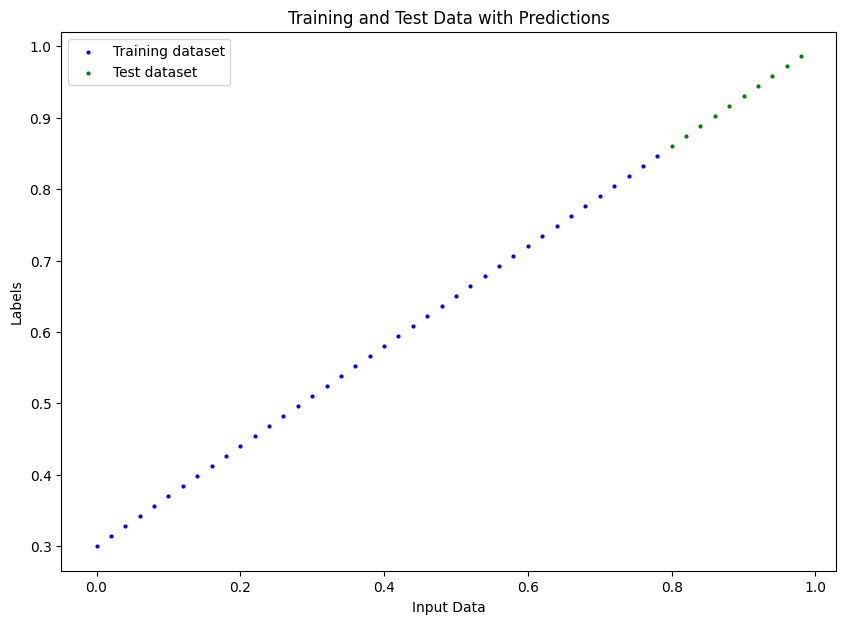

In [26]:
split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

def plot_prediction(Train_data, Train_label, Test_data, Test_label, Prediction=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(Train_data, Train_label, c='b', s=4, label='Training dataset')
    plt.scatter(Test_data, Test_label, c='g', s=4, label='Test dataset')
    if Prediction is not None:
        plt.scatter(Test_data, Prediction, c='r', label='Predictions')

    plt.xlabel("Input Data")
    plt.ylabel("Labels")
    plt.legend()
    plt.title("Training and Test Data with Predictions")
    plt.show()


plot_prediction(x_train, y_train, x_test, y_test, None)


In [27]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype = torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight*x+ self.bias

In [28]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [30]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

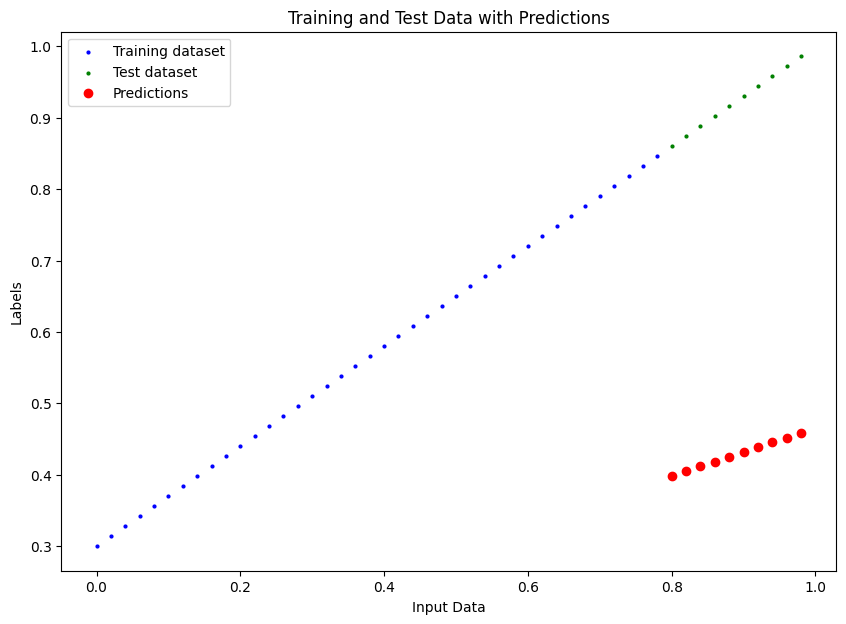

In [31]:
plot_prediction(x_train, y_train, x_test, y_test, y_preds)

In [32]:
# Training of the model on a dataset
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [33]:
epochs = 100;
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval() #turn of all parameters thats not required for testing in the model (batchout/norm layer)
    with torch.inference_mode():
      test_pred = model_0(x_test)
      test_loss = loss_fn(test_pred,y_test)
    print(f"epoch: {epoch}| loss: {loss}| test_loss: {test_loss}")

epoch: 0| loss: 0.31288138031959534| test_loss: 0.48106518387794495
epoch: 1| loss: 0.3013603389263153| test_loss: 0.4675942063331604
epoch: 2| loss: 0.28983935713768005| test_loss: 0.4541231691837311
epoch: 3| loss: 0.2783183455467224| test_loss: 0.44065219163894653
epoch: 4| loss: 0.26679736375808716| test_loss: 0.4271811842918396
epoch: 5| loss: 0.2552763521671295| test_loss: 0.41371020674705505
epoch: 6| loss: 0.24375534057617188| test_loss: 0.40023916959762573
epoch: 7| loss: 0.23223432898521423| test_loss: 0.3867681920528412
epoch: 8| loss: 0.22071333229541779| test_loss: 0.37329721450805664
epoch: 9| loss: 0.20919232070446014| test_loss: 0.3598262071609497
epoch: 10| loss: 0.1976713240146637| test_loss: 0.3463551998138428
epoch: 11| loss: 0.18615034222602844| test_loss: 0.3328842222690582
epoch: 12| loss: 0.1746293306350708| test_loss: 0.3194132149219513
epoch: 13| loss: 0.16310831904411316| test_loss: 0.30594223737716675
epoch: 14| loss: 0.1515873372554779| test_loss: 0.2924712

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])


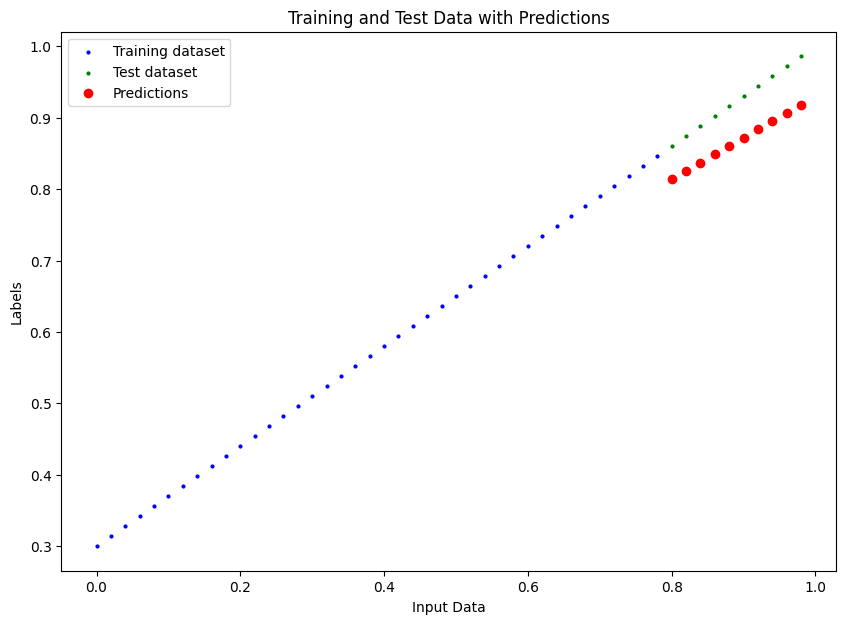

In [34]:
print(model_0.state_dict())
with torch.inference_mode():
  y_pred = model_0(x_test)

plot_prediction(x_train, y_train, x_test, y_test, y_pred)


In [37]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)
model_name = "pytorch_model_0.pth"
model_save_path = model_path/model_name
torch.save(obj=model_0.state_dict(),
          f=model_save_path)

In [43]:
model_0.state_dict()
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(model_save_path))
loaded_model_0.state_dict()

<ipython-input-43-709b13cabde8>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(model_save_path))


OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])